In [1513]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns 

In [1514]:
df=pd.read_csv("BRCA.csv")
df.head()


Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Modified Radical Mastectomy       15-Jan-17          19-Jun-17   
1                   Lumpectomy       26-Apr-17          09-Nov-18   
2                        Other       08-Sep-17          09-Jun-18   
3  Modified Radical Mastectomy       25-Jan-17          12-Jul-17   
4                        Other       06-May-17          27-Jun-19   

  Patient_Status  
0          Alive  
1           Dead  
2          Alive  
3          Alive  
4           Dead

# Keşifsel Veri Analizi (Exploratory Data Analysis - EDA) 🔎 

In [1515]:
df.drop("Patient_ID",axis=1,inplace=True) # remove patient id column

In [1516]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    float64
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(5), object(10)
memory usage: 40.1+ KB
None
   

In [1517]:
df.isna().sum()

Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [1518]:
df["Date_of_Last_Visit"]=pd.to_datetime(df["Date_of_Last_Visit"]) # handling date columns 
df["Date_of_Surgery"]=pd.to_datetime(df["Date_of_Surgery"])
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 334 non-null    float64       
 1   Gender              334 non-null    object        
 2   Protein1            334 non-null    float64       
 3   Protein2            334 non-null    float64       
 4   Protein3            334 non-null    float64       
 5   Protein4            334 non-null    float64       
 6   Tumour_Stage        334 non-null    object        
 7   Histology           334 non-null    object        
 8   ER status           334 non-null    object        
 9   PR status           334 non-null    object        
 10  HER2 status         334 non-null    object        
 11  Surgery_type        334 non-null    object        
 12  Date_of_Surgery     334 non-null    datetime64[ns]
 13  Date_of_Last_Visit  317 non-null    datetime64[ns]

In [1519]:
df.dropna(axis=0,inplace=True) #our missing values are in target column and less so removing acceptable. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 317 non-null    float64       
 1   Gender              317 non-null    object        
 2   Protein1            317 non-null    float64       
 3   Protein2            317 non-null    float64       
 4   Protein3            317 non-null    float64       
 5   Protein4            317 non-null    float64       
 6   Tumour_Stage        317 non-null    object        
 7   Histology           317 non-null    object        
 8   ER status           317 non-null    object        
 9   PR status           317 non-null    object        
 10  HER2 status         317 non-null    object        
 11  Surgery_type        317 non-null    object        
 12  Date_of_Surgery     317 non-null    datetime64[ns]
 13  Date_of_Last_Visit  317 non-null    datetime64[ns]
 14 

In [1520]:
df_backup=df.copy() # backup file 


# Feature engineering (creating new column)⚙️
it increased F1 scores of models (%+4-5)

In [1521]:
df["check_duration"]=(df["Date_of_Last_Visit"] - df["Date_of_Surgery"]).dt.days # calculate approximately  duration of checking
df["check_duration"]=df["check_duration"].astype("int32") # convert to datatype from float to int32 for memory usage


In [1522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 317 non-null    float64       
 1   Gender              317 non-null    object        
 2   Protein1            317 non-null    float64       
 3   Protein2            317 non-null    float64       
 4   Protein3            317 non-null    float64       
 5   Protein4            317 non-null    float64       
 6   Tumour_Stage        317 non-null    object        
 7   Histology           317 non-null    object        
 8   ER status           317 non-null    object        
 9   PR status           317 non-null    object        
 10  HER2 status         317 non-null    object        
 11  Surgery_type        317 non-null    object        
 12  Date_of_Surgery     317 non-null    datetime64[ns]
 13  Date_of_Last_Visit  317 non-null    datetime64[ns]
 14 

In [1523]:
df["Gender"].value_counts() #there are 4 men


Gender
FEMALE    313
MALE        4
Name: count, dtype: int64

In [1524]:
df[df["Gender"]=="MALE"] 

Age Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
5    84.0   MALE -0.081872   1.72410 -0.057335  0.043025          III   
152  51.0   MALE  0.837890   0.50642 -0.545130  0.314900           II   
271  68.0   MALE  1.470400   0.46900  0.135540 -0.289840           II   
330  44.0   MALE  0.732720   1.11170 -0.269520 -0.354920           II   

                          Histology ER status PR status HER2 status  \
5     Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
152  Infiltrating Lobular Carcinoma  Positive  Positive    Negative   
271   Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
330  Infiltrating Lobular Carcinoma  Positive  Positive    Negative   

                    Surgery_type Date_of_Surgery Date_of_Last_Visit  \
5    Modified Radical Mastectomy      2017-09-18         2021-11-15   
152            Simple Mastectomy      2018-05-30         2020-03-25   
271  Modified Radical Mastectomy      2019-04-25         2020-04-18   
330                        Other      2019-11-01         2020-03-04   

    Patient_Status  check_duration  
5            Alive            1519  
152          Alive             665  
271          Alive             359  
330           Dead             124

# Visualization 📊

In [1525]:
df.nunique()

Age                    57
Gender                  2
Protein1              316
Protein2              317
Protein3              317
Protein4              316
Tumour_Stage            3
Histology               3
ER status               1
PR status               1
HER2 status             2
Surgery_type            4
Date_of_Surgery       178
Date_of_Last_Visit    285
Patient_Status          2
check_duration        253
dtype: int64

In [1526]:
import plotly.express as px
df.dtypes

Age                          float64
Gender                        object
Protein1                     float64
Protein2                     float64
Protein3                     float64
Protein4                     float64
Tumour_Stage                  object
Histology                     object
ER status                     object
PR status                     object
HER2 status                   object
Surgery_type                  object
Date_of_Surgery       datetime64[ns]
Date_of_Last_Visit    datetime64[ns]
Patient_Status                object
check_duration                 int32
dtype: object

In [1527]:
num_categ=df.select_dtypes(include=["int32","float"]) #select numerical columns
int(len(num_categ.columns)/2) # setting row number for visualizing


3

In [1528]:
num_ofrow=len(num_categ.columns)
round(num_ofrow/2)+1

4

In [1529]:
num_categ.columns

Index(['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'check_duration'],
      dtype='object')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_general_df(dataframe):
    num_of_row=len(dataframe.columns)+1
    fig, ax = plt.subplots((round(num_of_row / 2)), 2, figsize=(25, 35))
    ax = ax.ravel()  # Flatten the array of axes
    for i, col in enumerate(dataframe.columns):
        if dataframe[col].dtype == "object":
            sns.countplot(data=df, x=col, hue="Patient_Status", ax=ax[i])
            ax[i].set_title(f"Count plot of {col} vs Breast Cancer Status")
            ax[i].set_xlabel(col)
            ax[i].set_ylabel("Count")
            ax[i].tick_params(axis="x", rotation=4)

        elif pd.api.types.is_numeric_dtype(dataframe[col]):  # Check for numeric columns
            sns.kdeplot(data=df, x=col, hue="Patient_Status", ax=ax[i])
            ax[i].set_title(f"Histogram plot of {col}")
            ax[i].set_xlabel(col)
            ax[i].tick_params(axis="x", rotation=15,labelsize=12)
        else:
            continue

    plt.tight_layout()
    plt.show()


In [1531]:
import pandas as pd
import plotly.express as px



# Select numerical columns
num_cols = df.select_dtypes(include=['float64', 'int32']).columns

# Create violin plots for each numerical column
for col in num_cols:
    fig = px.violin(df, y=col, x="Tumour_Stage", color="Patient_Status", box=True, points="all",
                    hover_data=df.columns, title=f"Violin Plot of {col} by Tumour stage")
    fig.show()



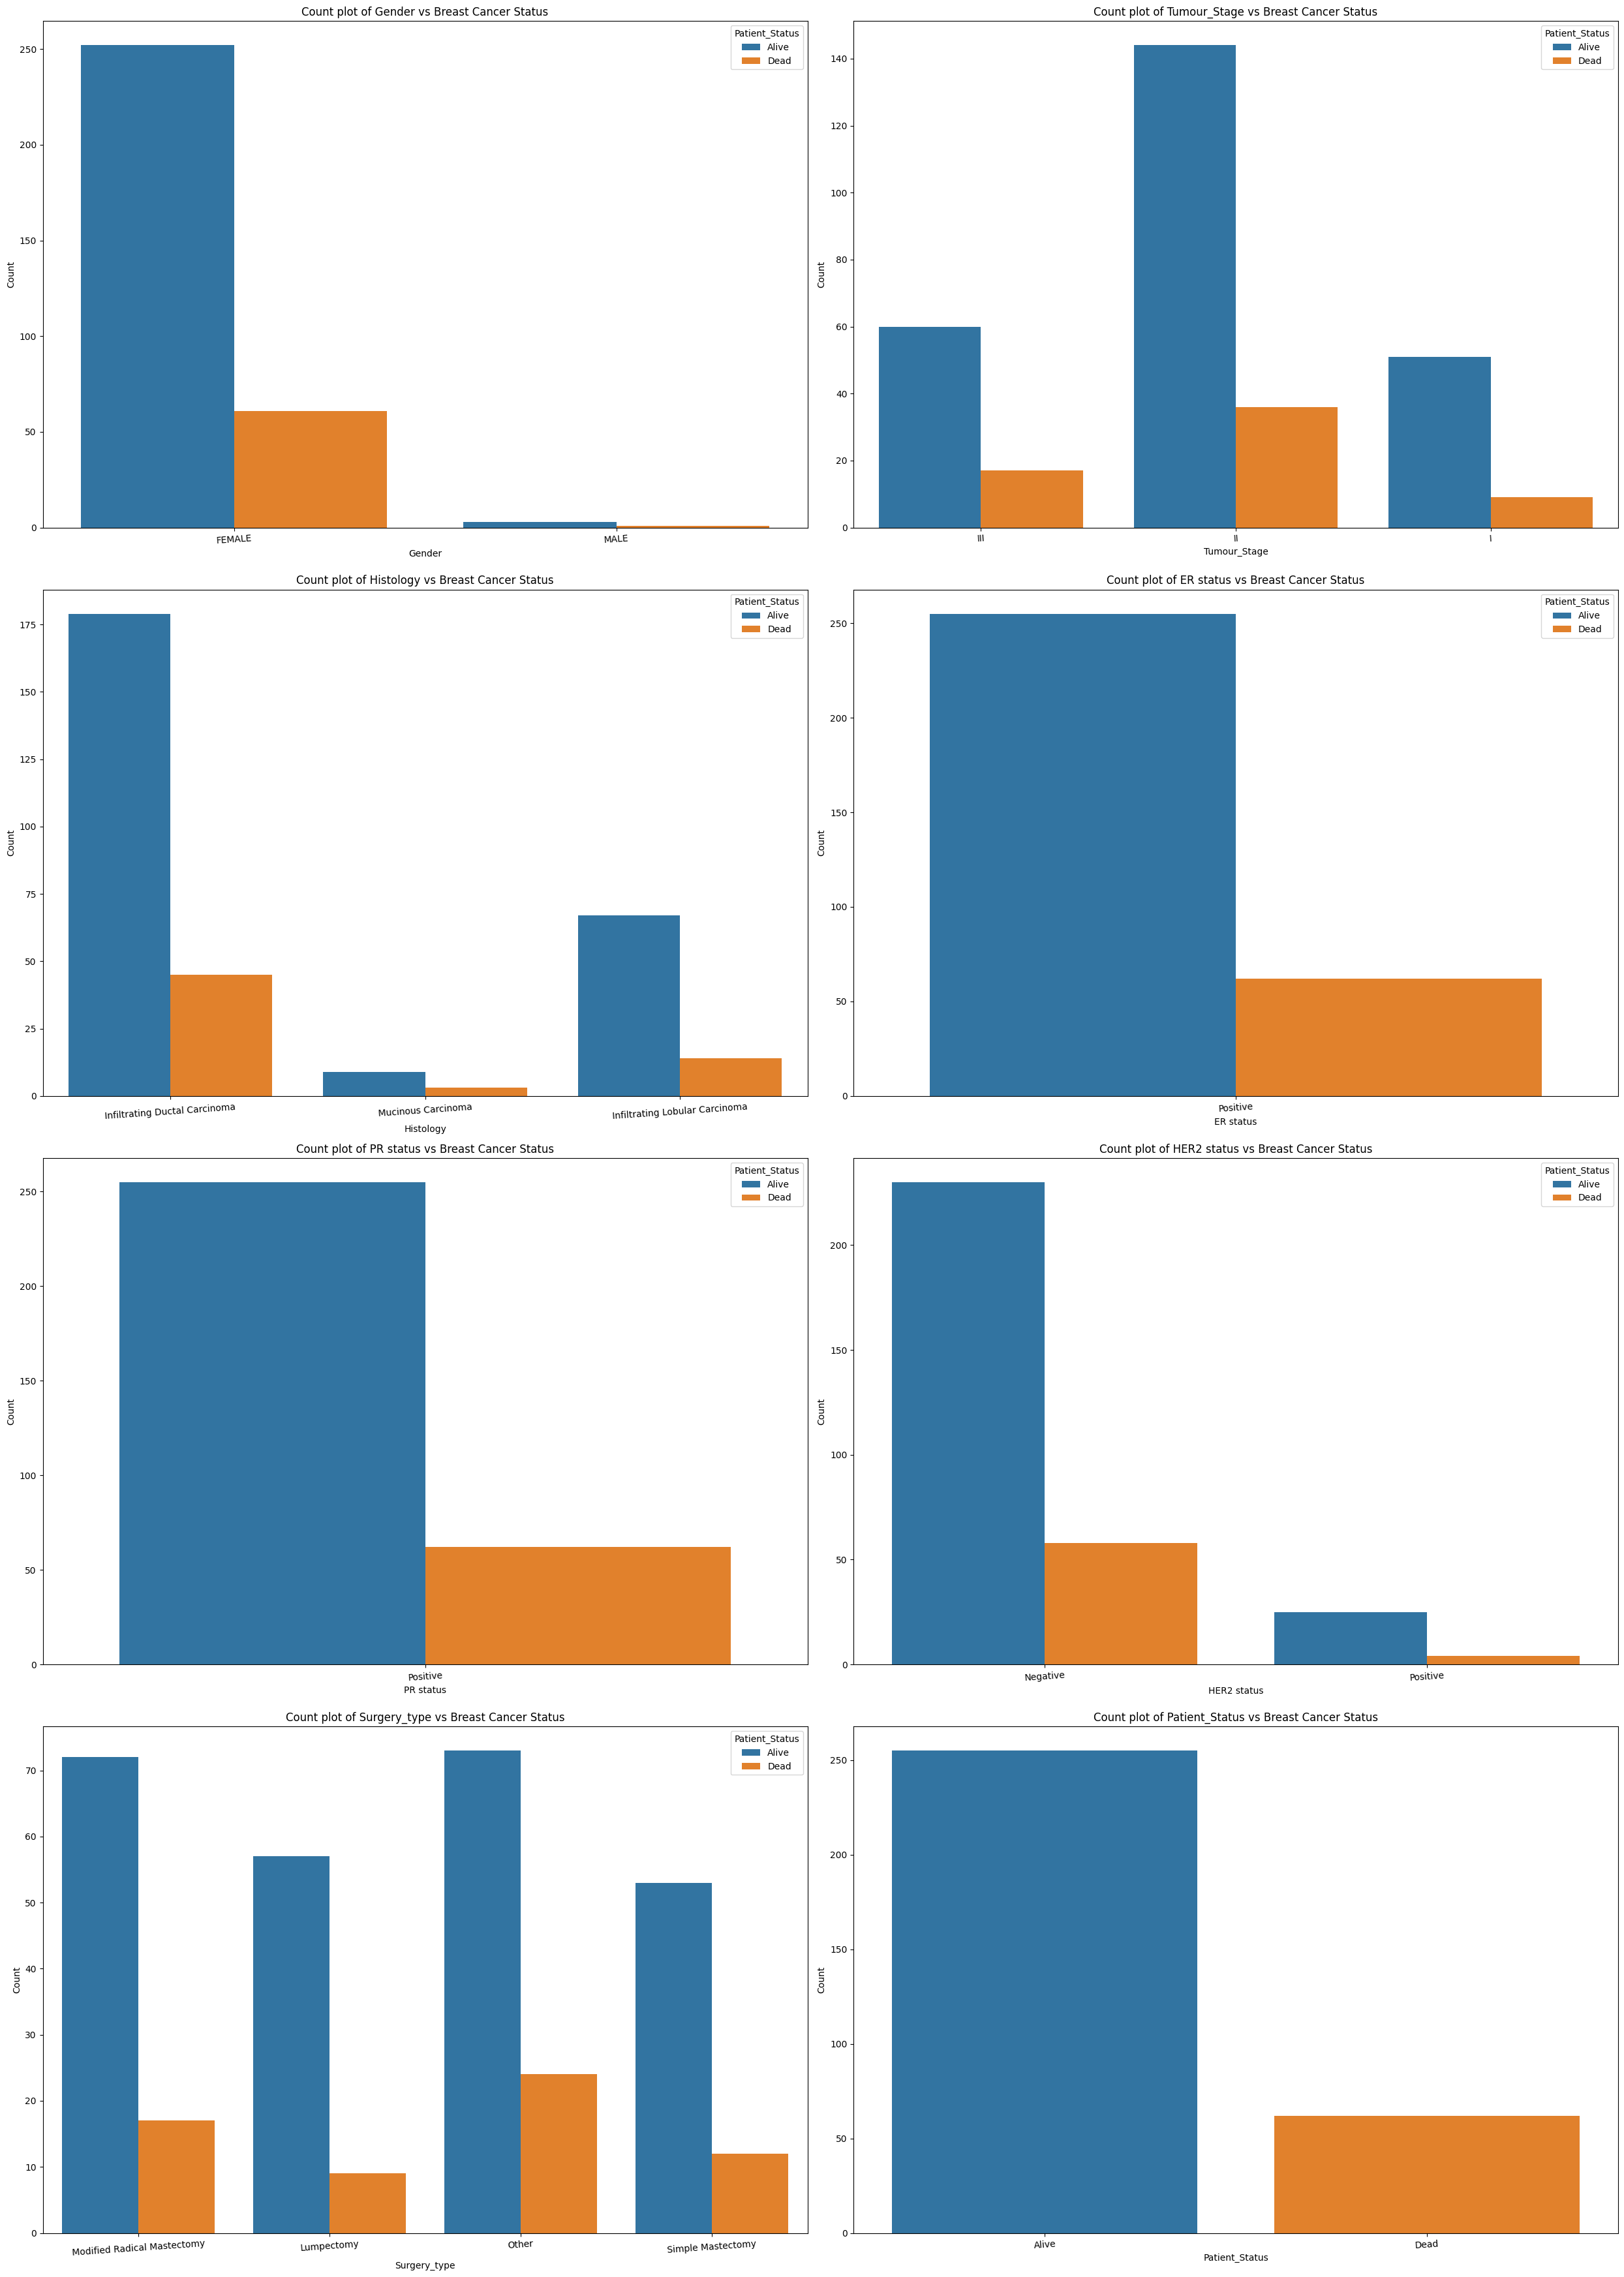

In [1532]:
categ_col = df.select_dtypes(include=["object"])
num_categ=df.select_dtypes(include=["int32","float"])
#categ_col.drop("Patient_Status",inplace=True)
plot_general_df(categ_col) #categorical columns visualization



# WE Have imbalanced data

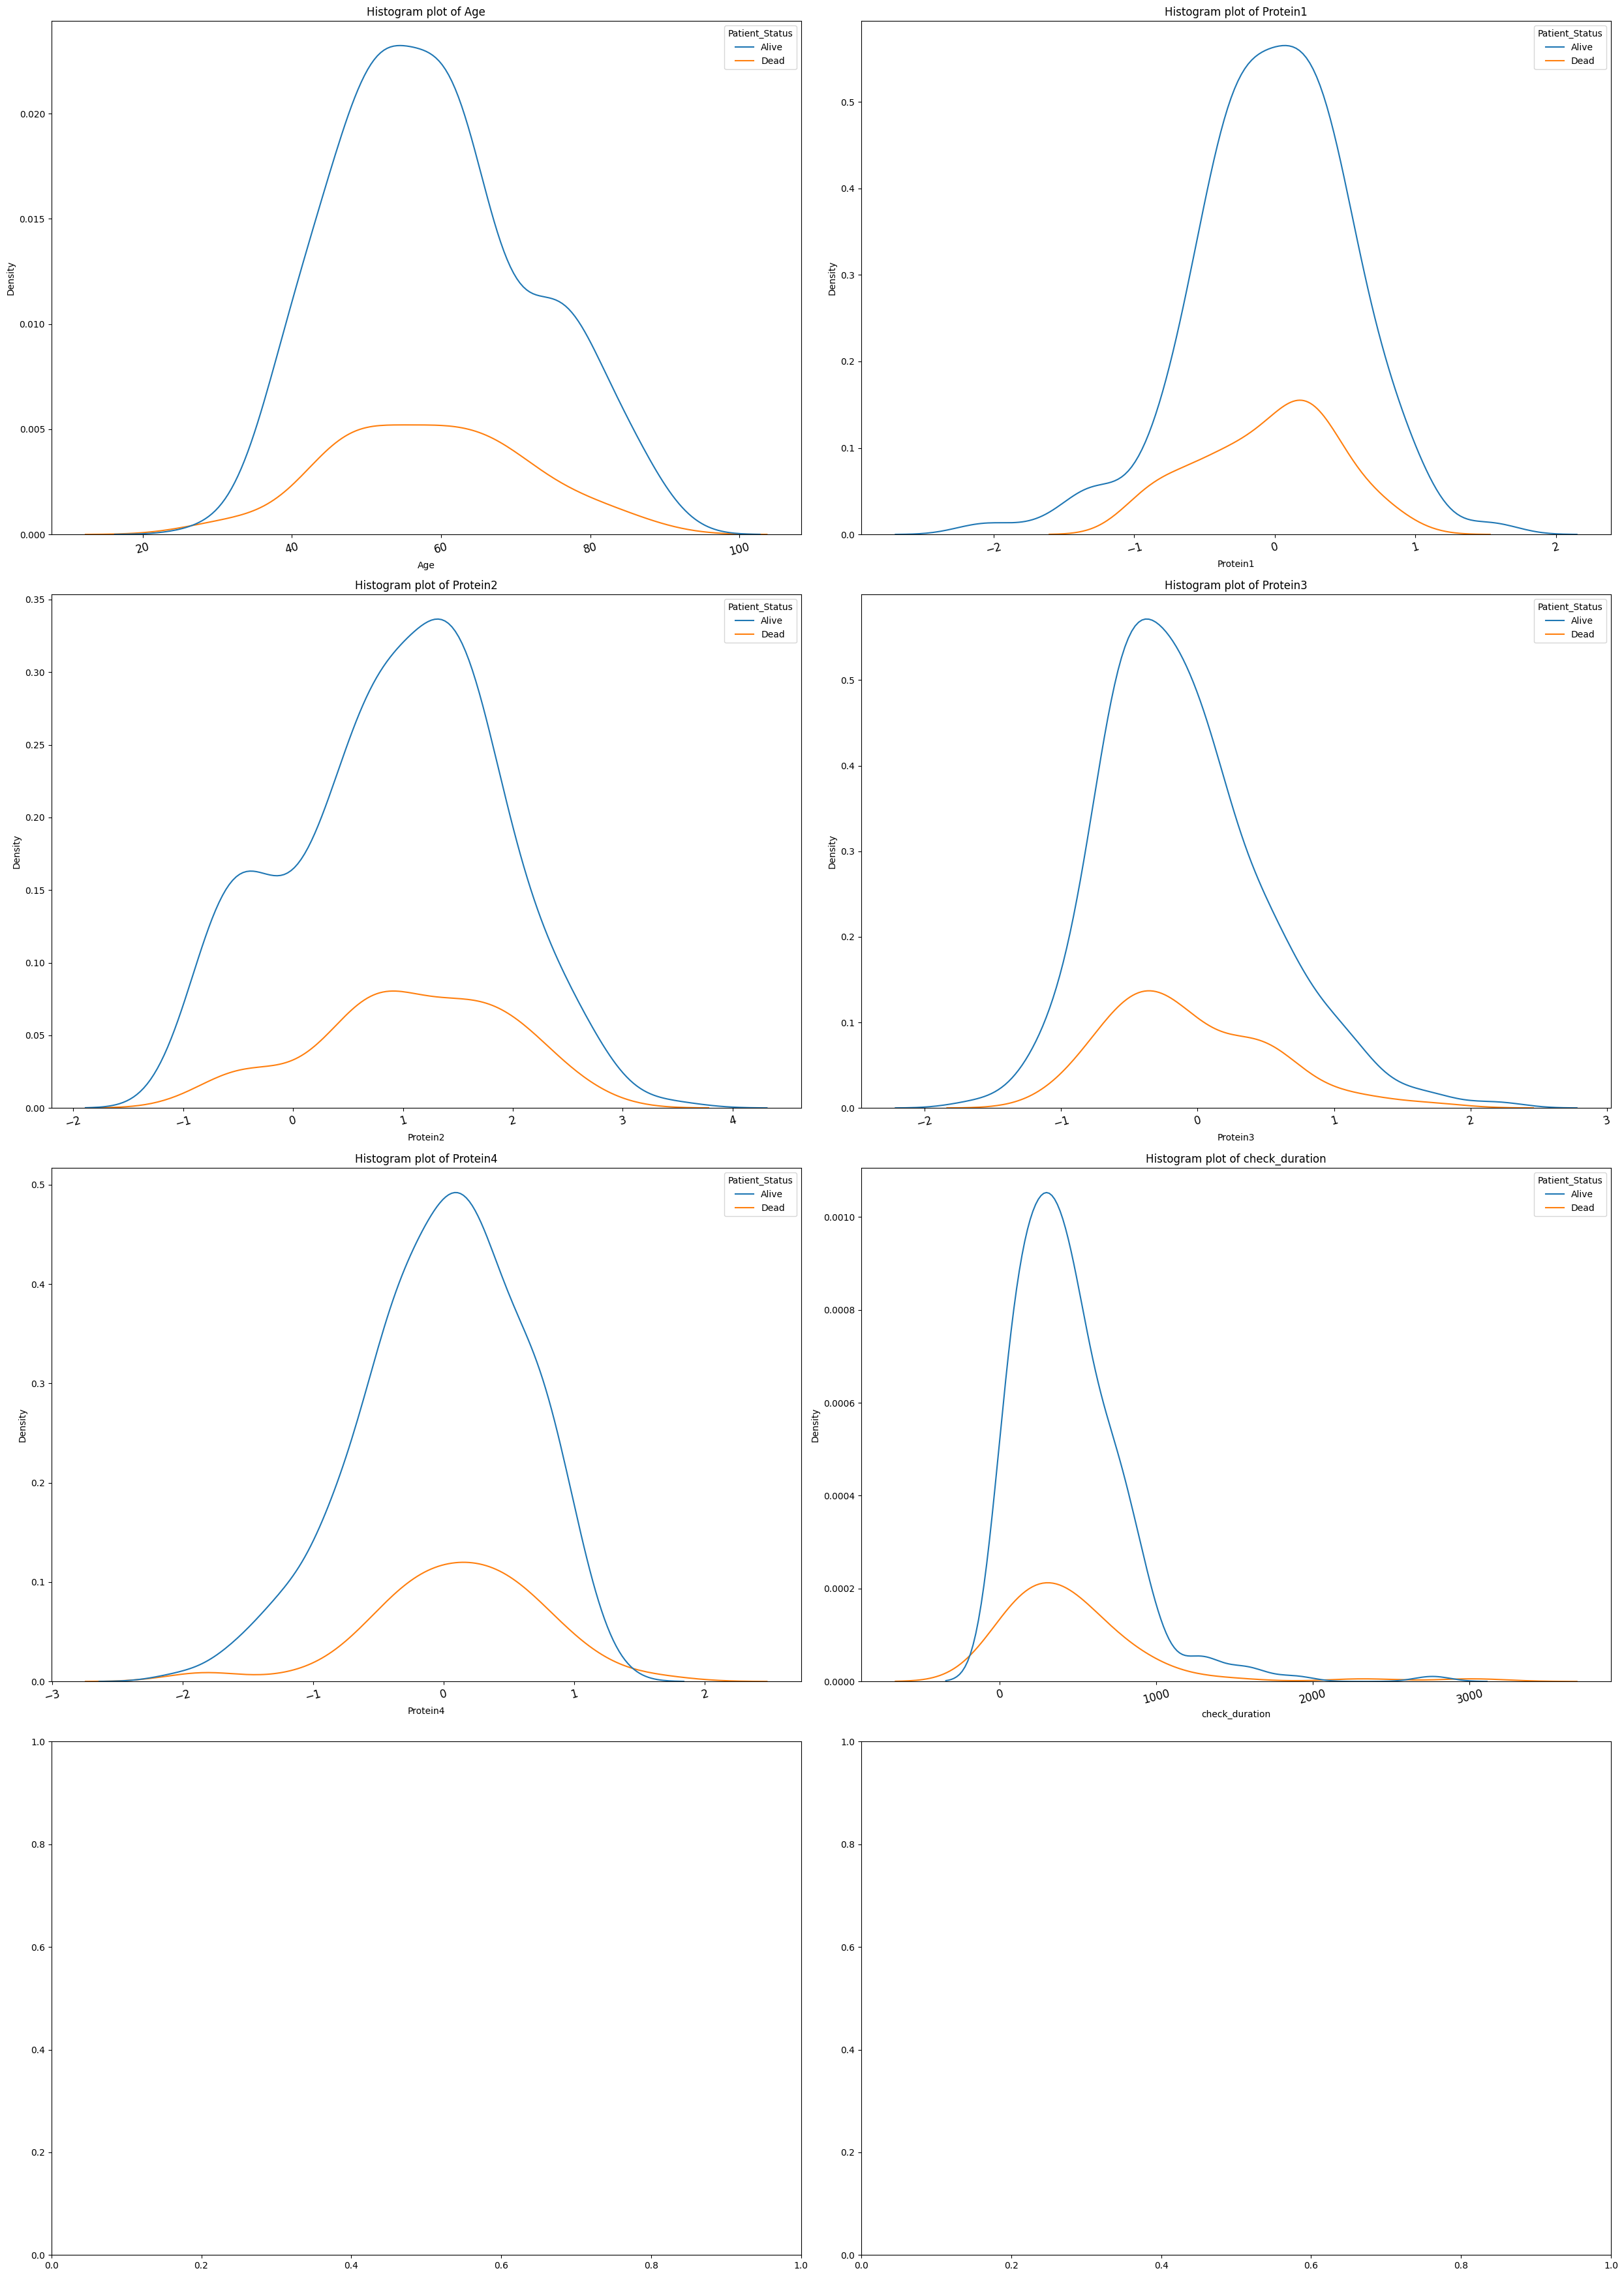

In [1533]:
plot_general_df(num_categ)

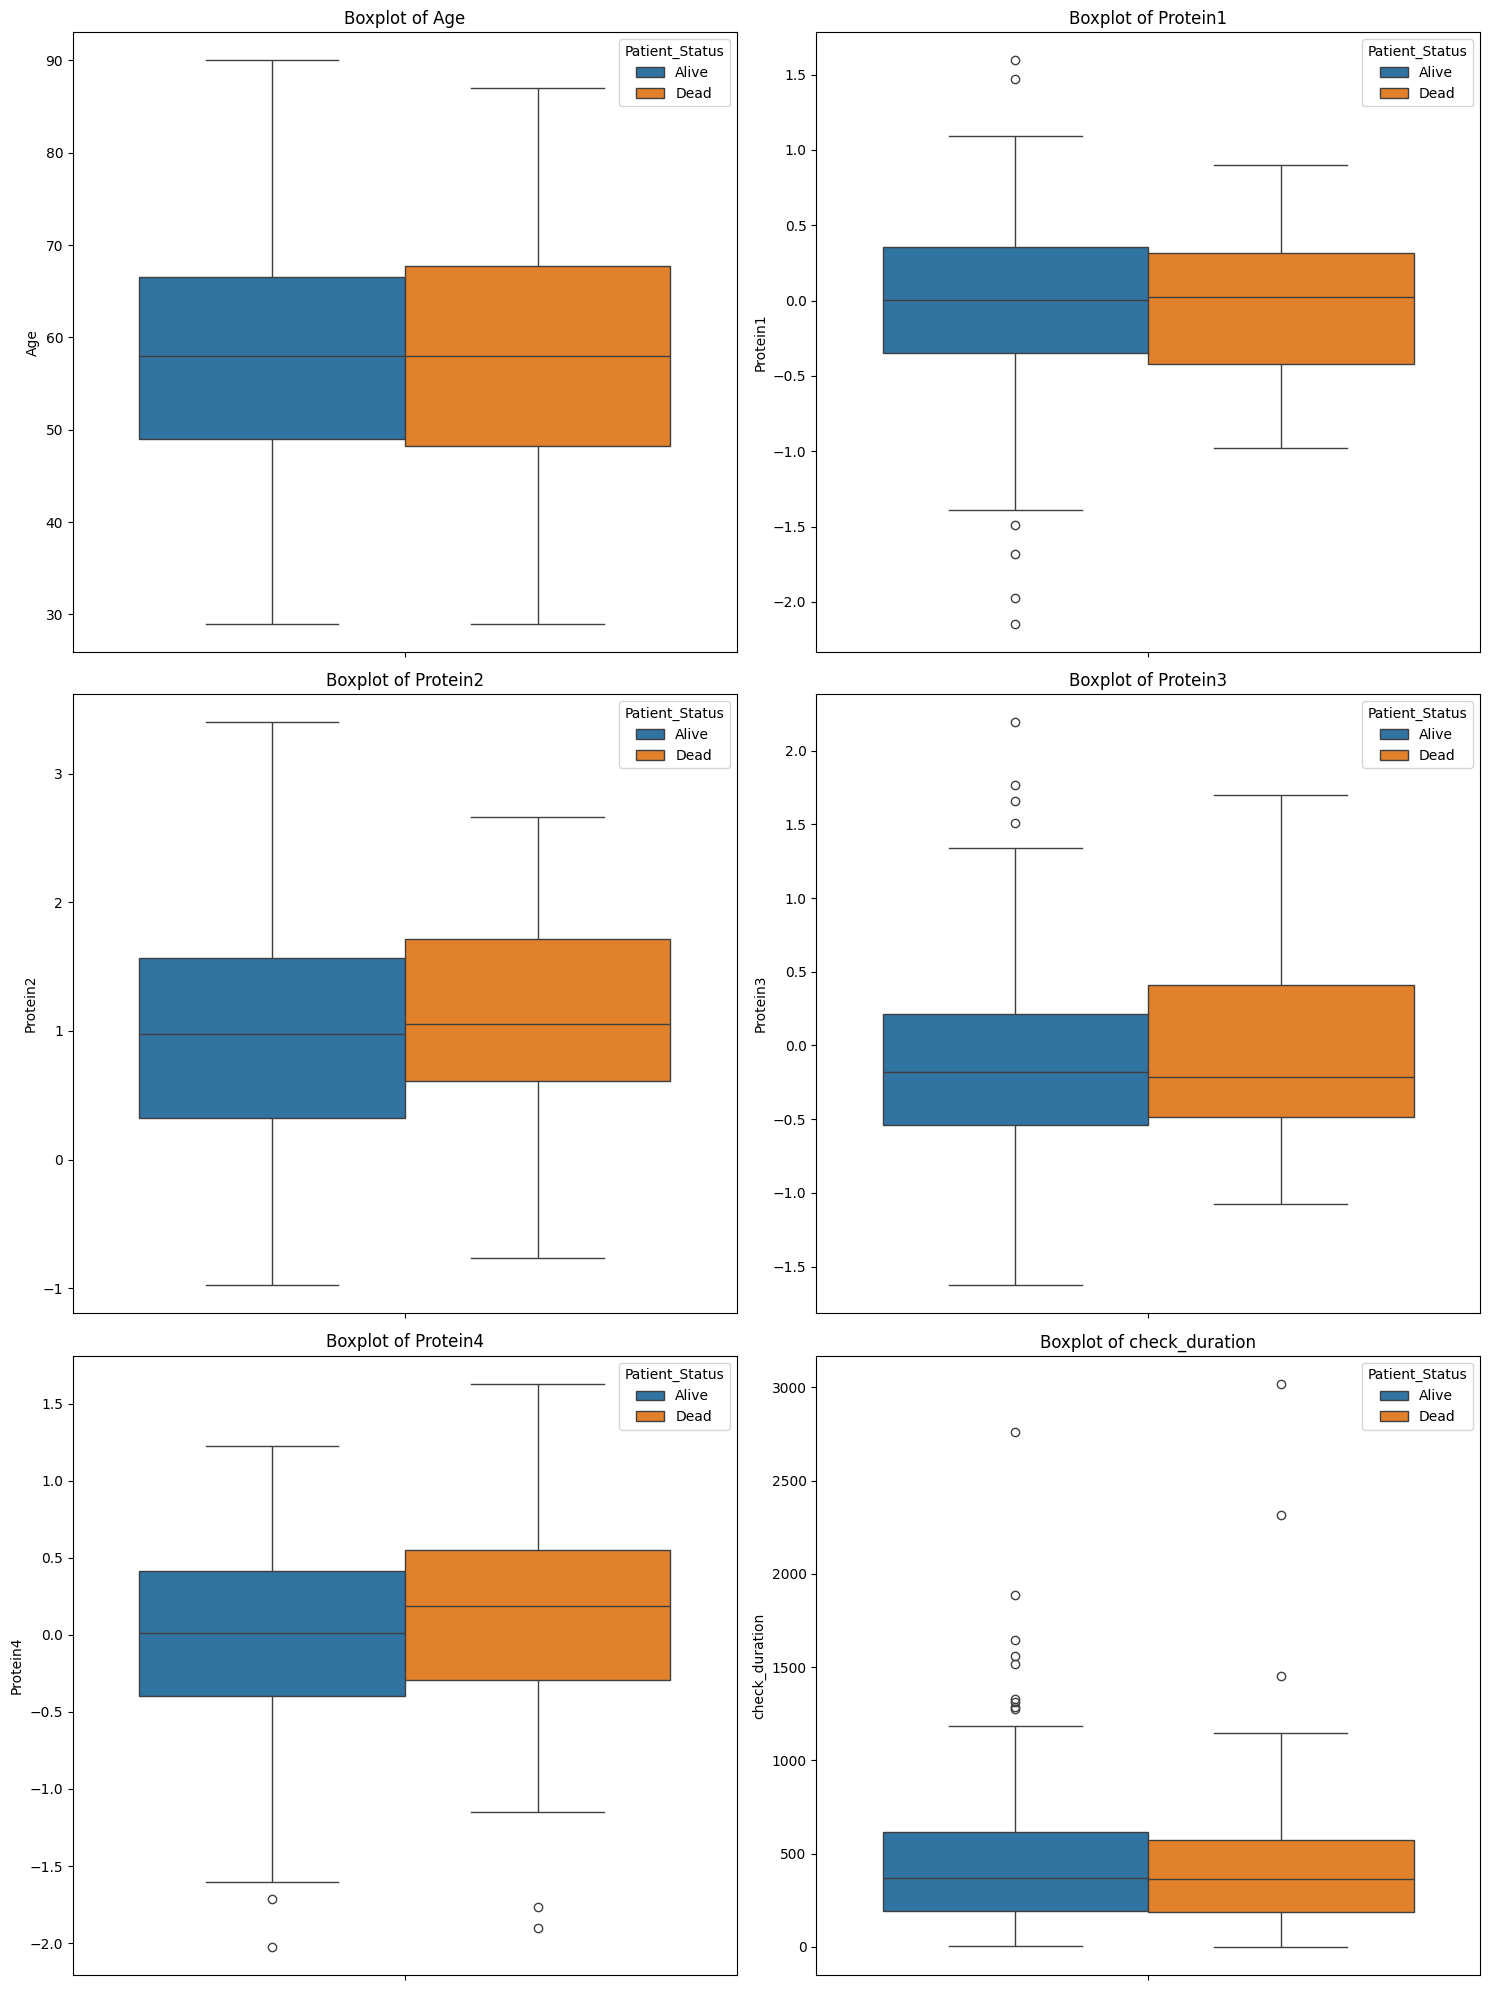

In [1534]:
fig,ax=plt.subplots(3,2,figsize=(15,20))
ax=ax.ravel()
for i,col in enumerate(num_cols):
    sns.boxplot(df,y=col,hue="Patient_Status",ax=ax[i])
    ax[i].set_title(f"Boxplot of {col}")  # Add title
plt.tight_layout()
plt.show()

# I won't remove outliers . Already we have less data and they are not outliers they are close to tip of the plots


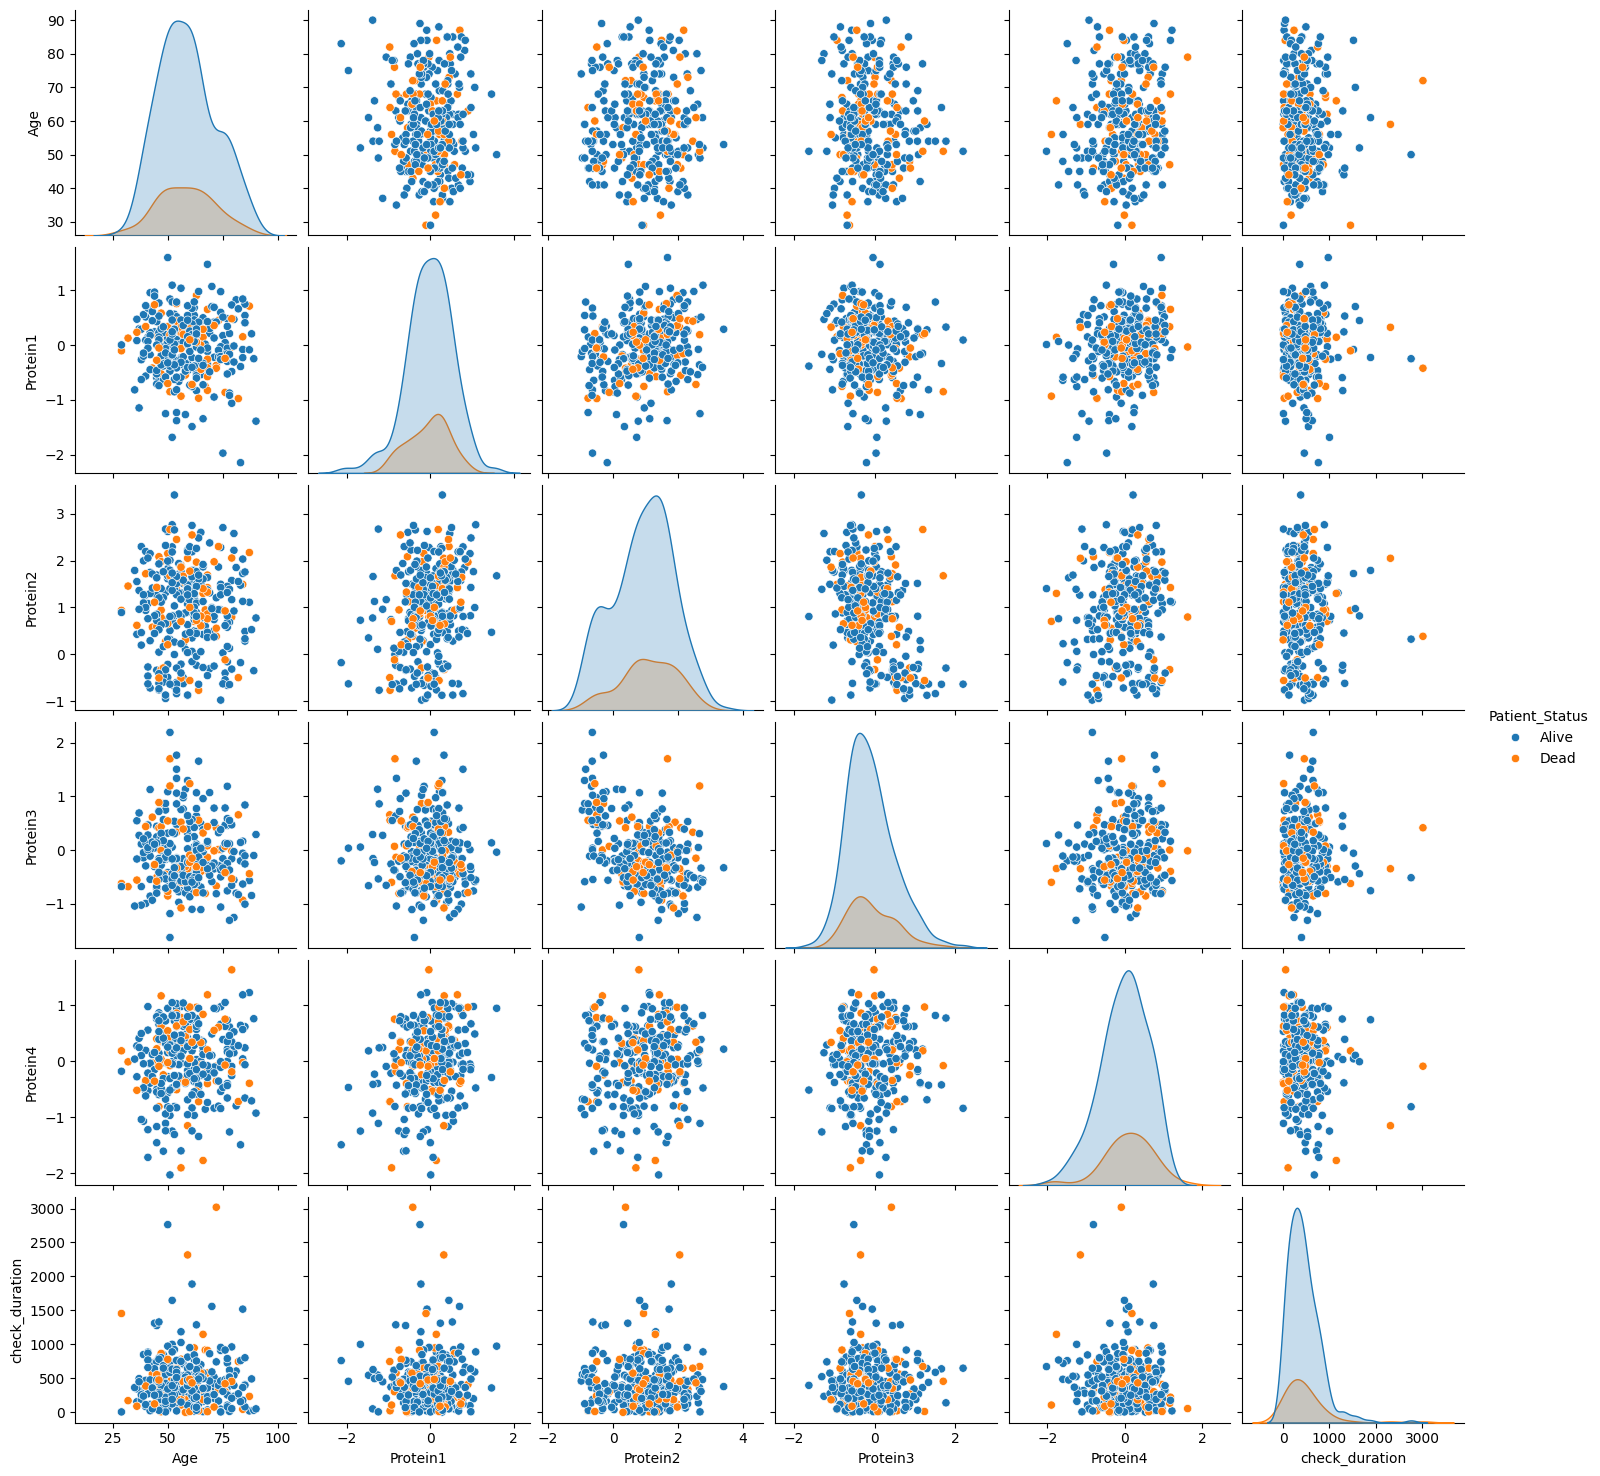

In [1535]:
sns.pairplot(df,hue="Patient_Status")

# the dots in Scatter  plot shows that  they are  interwined.
Ayırt etmesi çok zor olacak...

In [1536]:
num_categ.columns

Index(['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'check_duration'],
      dtype='object')

In [1537]:
num_cols

Index(['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'check_duration'],
      dtype='object')

# Preprocessing 🛠️

In [1538]:

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [1539]:
for x in categ_col:           # differentiating columns to for one-hot-encoding and label encoding
    print(df[x].value_counts())
    print("----------")

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64
----------
Tumour_Stage
II     180
III     77
I       60
Name: count, dtype: int64
----------
Histology
Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: count, dtype: int64
----------
ER status
Positive    317
Name: count, dtype: int64
----------
PR status
Positive    317
Name: count, dtype: int64
----------
HER2 status
Negative    288
Positive     29
Name: count, dtype: int64
----------
Surgery_type
Other                          97
Modified Radical Mastectomy    89
Lumpectomy                     66
Simple Mastectomy              65
Name: count, dtype: int64
----------
Patient_Status
Alive    255
Dead      62
Name: count, dtype: int64
----------


In [1540]:
df.drop(columns=["PR status","ER status"],axis=1,inplace=True)  # removing  column which have single unique value
df.nunique()

Age                    57
Gender                  2
Protein1              316
Protein2              317
Protein3              317
Protein4              316
Tumour_Stage            3
Histology               3
HER2 status             2
Surgery_type            4
Date_of_Surgery       178
Date_of_Last_Visit    285
Patient_Status          2
check_duration        253
dtype: int64

In [1541]:
stage_mapping = { # apply label encoding to ordinal data 
    'I': 0,
    'II': 1,
    'III': 2
}

# Apply the map function to the 'Tumor_Stage' column
df['Tumour_Stage'] = df['Tumour_Stage'].map(stage_mapping)

In [1542]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder() #Apply label encoding
le_columns=["Patient_Status","HER2 status","Gender","Patient_Status"] #label encoding columns
for x in le_columns:
    df[x]=le.fit_transform(df[x])
df

Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0    36.0       0  0.080353   0.42638   0.54715  0.273680             2   
1    43.0       0 -0.420320   0.57807   0.61447 -0.031505             1   
2    69.0       0  0.213980   1.31140  -0.32747 -0.234260             2   
3    56.0       0  0.345090  -0.21147  -0.19304  0.124270             1   
4    56.0       0  0.221550   1.90680   0.52045 -0.311990             1   
..    ...     ...       ...       ...       ...       ...           ...   
329  36.0       0  0.231800   0.61804  -0.55779 -0.517350             2   
330  44.0       1  0.732720   1.11170  -0.26952 -0.354920             1   
331  61.0       0 -0.719470   2.54850  -0.15024  0.339680             1   
332  79.0       0  0.479400   2.05590  -0.53136 -0.188480             0   
333  76.0       0 -0.244270   0.92556  -0.41823 -0.067848             0   

                          Histology  HER2 status                 Surgery_type  \
0     Infiltrating Ductal Carcinoma            0  Modified Radical Mastectomy   
1                Mucinous Carcinoma            0                   Lumpectomy   
2     Infiltrating Ductal Carcinoma            0                        Other   
3     Infiltrating Ductal Carcinoma            0  Modified Radical Mastectomy   
4     Infiltrating Ductal Carcinoma            0                        Other   
..                              ...          ...                          ...   
329   Infiltrating Ductal Carcinoma            1            Simple Mastectomy   
330  Infiltrating Lobular Carcinoma            0                        Other   
331   Infiltrating Ductal Carcinoma            0                   Lumpectomy   
332   Infiltrating Ductal Carcinoma            1                   Lumpectomy   
333   Infiltrating Ductal Carcinoma            0                   Lumpectomy   

    Date_of_Surgery Date_of_Last_Visit  Patient_Status  check_duration  
0        2017-01-15         2017-06-19               0             155  
1        2017-04-26         2018-11-09               1             562  
2        2017-09-08         2018-06-09               0             274  
3        2017-01-25         2017-07-12               0             168  
4        2017-05-06         2019-06-27               1             782  
..              ...                ...             ...             ...  
329      2019-11-11         2020-02-09               1              90  
330      2019-11-01         2020-03-04               1             124  
331      2019-11-11         2021-01-18               1             434  
332      2019-11-21         2021-02-19               1             456  
333      2019-11-11         2021-01-05               1             421  

[317 rows x 14 columns]

In [1543]:
df.nunique()

Age                    57
Gender                  2
Protein1              316
Protein2              317
Protein3              317
Protein4              316
Tumour_Stage            3
Histology               3
HER2 status             2
Surgery_type            4
Date_of_Surgery       178
Date_of_Last_Visit    285
Patient_Status          2
check_duration        253
dtype: int64

In [1544]:
ohe_columns=["Surgery_type","Histology"]
ohe=OneHotEncoder(sparse_output=False)
for x in ohe_columns:
    
    encoded_array = ohe.fit_transform(df[[x]])


    encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out([x]))
    
    # Concatenate the encoded DataFrame with the original DataFrame
    df = pd.concat([df, encoded_df], axis=1).drop(columns=[x])


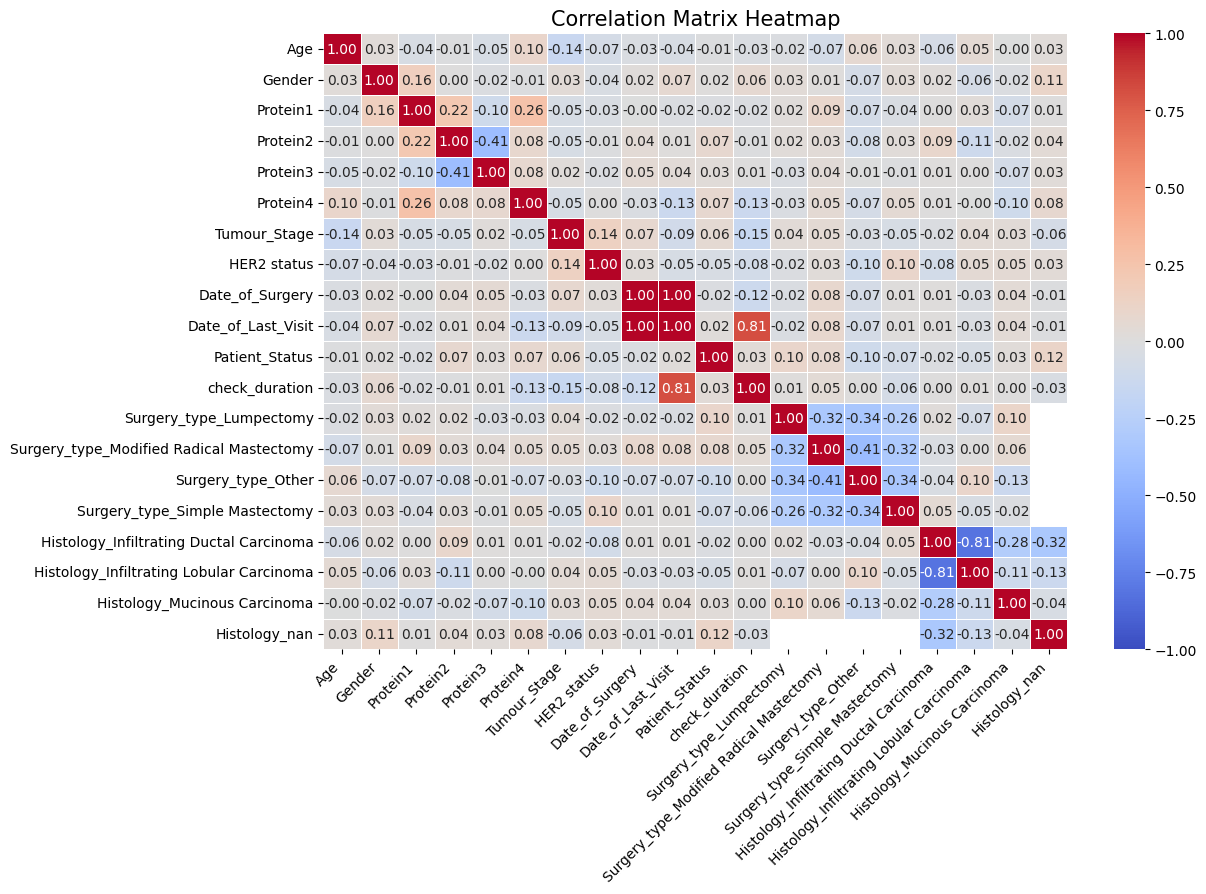

In [ ]:
#correlation matrix
correlation_matrix = df.corr()

#  figure size
plt.figure(figsize=(12, 8))  # Adjust size based on the number of columns

# Create heatmap with better visualization
sns.heatmap(correlation_matrix, 
            annot=True,       # Show correlation values
            fmt=".2f",        # Format to 2 decimal places
            cmap="coolwarm",  # Use a good color map
            linewidths=0.5,   # Thin grid lines
            vmin=-1, vmax=1)  # Keep scale from -1 to 1

plt.title("Correlation Matrix Heatmap", fontsize=15)
plt.xticks(rotation=45, ha="right") # X axis columns is written with 45 degree  
plt.yticks(rotation=0)  # Y- axis is  written straight
plt.show()


In [1546]:
df.info() # I noticed there are nan values 

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 321
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Age                                       317 non-null    float64       
 1   Gender                                    317 non-null    float64       
 2   Protein1                                  317 non-null    float64       
 3   Protein2                                  317 non-null    float64       
 4   Protein3                                  317 non-null    float64       
 5   Protein4                                  317 non-null    float64       
 6   Tumour_Stage                              317 non-null    float64       
 7   HER2 status                               317 non-null    float64       
 8   Date_of_Surgery                           317 non-null    datetime64[ns]
 9   Date_of_Last_Visit                   

In [1547]:
df.drop("Histology_nan",axis=1,inplace=True)


In [1548]:
df.dropna(axis=0,inplace=True)
df.drop(columns=["Date_of_Last_Visit","Date_of_Surgery"],axis=1,inplace=True)

In [1549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 0 to 316
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       301 non-null    float64
 1   Gender                                    301 non-null    float64
 2   Protein1                                  301 non-null    float64
 3   Protein2                                  301 non-null    float64
 4   Protein3                                  301 non-null    float64
 5   Protein4                                  301 non-null    float64
 6   Tumour_Stage                              301 non-null    float64
 7   HER2 status                               301 non-null    float64
 8   Patient_Status                            301 non-null    float64
 9   check_duration                            301 non-null    float64
 10  Surgery_type_Lumpectomy                   3

In [ ]:
x=df.drop("Patient_Status",axis=1)
y=df["Patient_Status"]
x

Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0    36.0     0.0  0.080353  0.426380  0.547150  0.273680           2.0   
1    43.0     0.0 -0.420320  0.578070  0.614470 -0.031505           1.0   
2    69.0     0.0  0.213980  1.311400 -0.327470 -0.234260           2.0   
3    56.0     0.0  0.345090 -0.211470 -0.193040  0.124270           1.0   
4    56.0     0.0  0.221550  1.906800  0.520450 -0.311990           1.0   
..    ...     ...       ...       ...       ...       ...           ...   
312  66.0     0.0 -1.344100  1.128000 -0.229350 -0.229930           1.0   
313  65.0     0.0 -0.091334  0.054757  0.034648 -0.588830           1.0   
314  44.0     0.0  0.891850  0.444400  0.110200  0.156850           1.0   
315  61.0     0.0 -0.405920  2.751300 -0.595420  0.816390           0.0   
316  54.0     0.0 -1.231300 -0.767670  0.861600  0.239050           1.0   

     HER2 status  check_duration  Surgery_type_Lumpectomy  \
0            0.0           155.0                      0.0   
1            0.0           562.0                      1.0   
2            0.0           274.0                      0.0   
3            0.0           168.0                      0.0   
4            0.0           782.0                      0.0   
..           ...             ...                      ...   
312          0.0           496.0                      0.0   
313          0.0           520.0                      0.0   
314          0.0           252.0                      1.0   
315          0.0           481.0                      1.0   
316          0.0           512.0                      1.0   

     Surgery_type_Modified Radical Mastectomy  Surgery_type_Other  \
0                                         1.0                 0.0   
1                                         0.0                 0.0   
2                                         0.0                 1.0   
3                                         1.0                 0.0   
4                                         0.0                 1.0   
..                                        ...                 ...   
312                                       0.0                 0.0   
313                                       0.0                 1.0   
314                                       0.0                 0.0   
315                                       0.0                 0.0   
316                                       0.0                 0.0   

     Surgery_type_Simple Mastectomy  Histology_Infiltrating Ductal Carcinoma  \
0                               0.0                                      1.0   
1                               0.0                                      0.0   
2                               0.0                                      1.0   
3                               0.0                                      1.0   
4                               0.0                                      1.0   
..                              ...                                      ...   
312                             1.0                                      1.0   
313                             0.0                                      0.0   
314                             0.0                                      1.0   
315                             0.0                                      1.0   
316                             0.0                                      1.0   

     Histology_Infiltrating Lobular Carcinoma  Histology_Mucinous Carcinoma  
0                                         0.0                           0.0  
1                                         0.0                           1.0  
2                                         0.0                           0.0  
3                                         0.0                           0.0  
4                                         0.0                           0.0  
..                                        ...                           ...  
312                                 

In [1551]:
#Normalization
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

ss=StandardScaler()
x_train[num_cols] = ss.fit_transform(x_train[num_cols])
x_test[num_cols] = ss.transform(x_test[num_cols])


In [1552]:
model_dic={}
results_df = pd.DataFrame(columns=["Model", "Mean_f1","F1-Score"])

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Cross validation K fold can be used  in imbalanced dataset 
# It equally split data as train and test set
def ml_model(model,x_train,y_train):
    global results_df

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    scores = cross_val_score(model, x_train, y_train, cv=skf, scoring='f1_weighted')
    f1 = f1_score(y_test, y_pred, average="weighted")  # Use "weighted" for imbalance handling
   # Cross-Validation Scores
    print("Cross-Validation f1:", scores)
    print("Mean f1:", np.mean(scores))
    
    mean_f1=np.mean(scores)
    
    new_df = pd.DataFrame([{
        "Model": type(model).__name__, "Mean_f1": mean_f1, "F1-Score": f1
    }])
    results_df = pd.concat([results_df, new_df], ignore_index=False)
    # Print Confusion Matrix and Classification Report
    cm=confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model} ")
    plt.show()
    print("Classification Report:\n", classification_report(y_test, y_pred))

Cross-Validation f1: [0.72844828 0.72844828 0.72844828 0.72844828 0.72844828]
Mean f1: 0.728448275862069


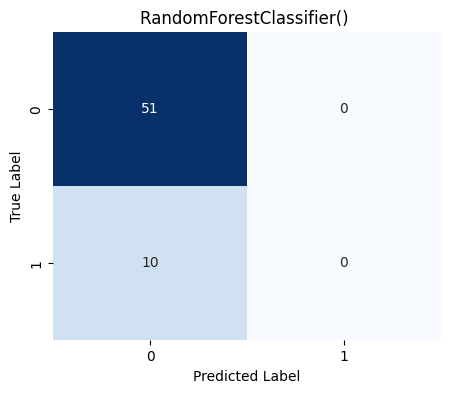

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        51
         1.0       0.00      0.00      0.00        10

    accuracy                           0.84        61
   macro avg       0.42      0.50      0.46        61
weighted avg       0.70      0.84      0.76        61



In [1554]:
rf=RandomForestClassifier() # zero learning problem machine always predict 0  because of majority variable 
ml_model(rf,x_train,y_train)

Cross-Validation f1: [0.59166667 0.49800566 0.66404762 0.5726912  0.5546875 ]
Mean f1: 0.5762197289507827


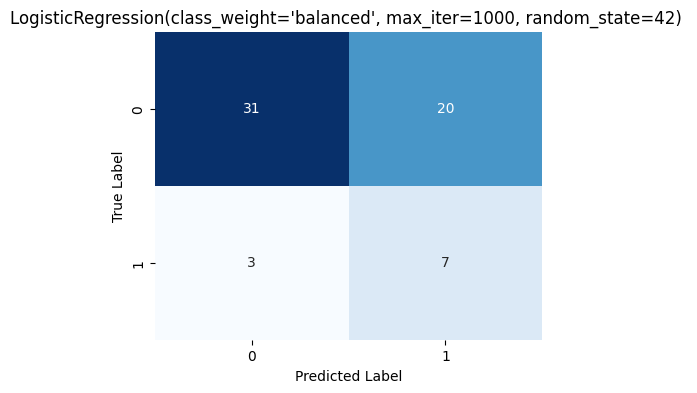

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.61      0.73        51
         1.0       0.26      0.70      0.38        10

    accuracy                           0.62        61
   macro avg       0.59      0.65      0.55        61
weighted avg       0.80      0.62      0.67        61



In [1555]:
lr=LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000) # ı should use smote 
ml_model(lr,x_train,y_train)

Cross-Validation f1: [0.71802326 0.73366543 0.75216049 0.70709877 0.70735294]
Mean f1: 0.7236601774408543


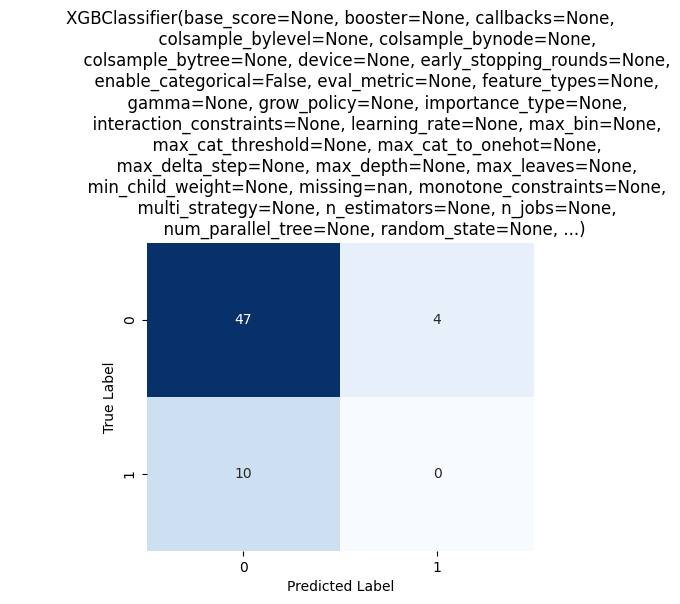

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.92      0.87        51
         1.0       0.00      0.00      0.00        10

    accuracy                           0.77        61
   macro avg       0.41      0.46      0.44        61
weighted avg       0.69      0.77      0.73        61



In [1557]:
from xgboost import XGBClassifier
model = XGBClassifier()
ml_model(model,x_train,y_train)

# Smote oversampling

In [1558]:
from imblearn.over_sampling import SMOTE #increasing minority class
smote = SMOTE(random_state=42)
x_train_over_sampled, y_train_over_sampled = smote.fit_resample(x_train, y_train)

Cross-Validation f1: [0.89736842 0.78201545 0.83330593 0.76907895 0.93580247]
Mean f1: 0.8435142450060281


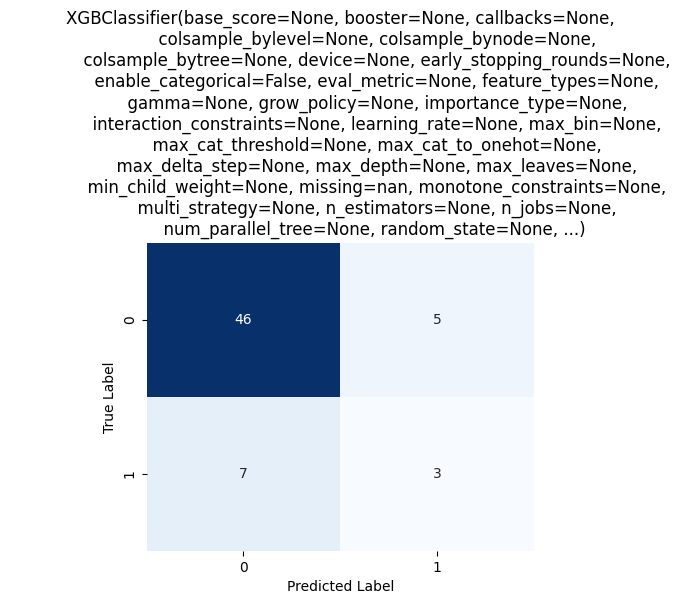

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.88        51
         1.0       0.38      0.30      0.33        10

    accuracy                           0.80        61
   macro avg       0.62      0.60      0.61        61
weighted avg       0.79      0.80      0.79        61



In [1559]:
from xgboost import XGBClassifier
model = XGBClassifier()
ml_model(model,x_train_over_sampled,y_train_over_sampled)

Cross-Validation f1: [0.62814401 0.51601543 0.58538206 0.56150794 0.64682207]
Mean f1: 0.5875743004206366


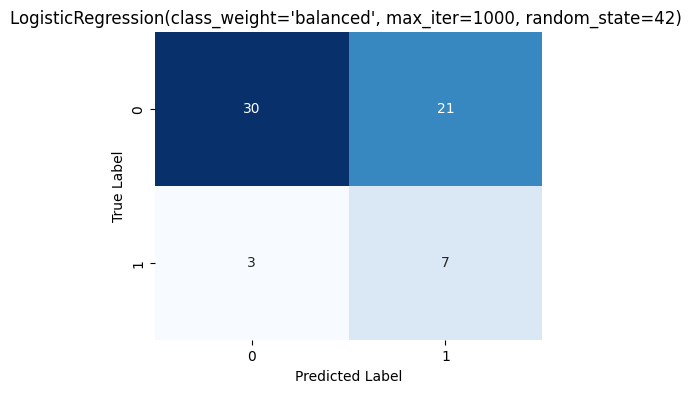

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.59      0.71        51
         1.0       0.25      0.70      0.37        10

    accuracy                           0.61        61
   macro avg       0.58      0.64      0.54        61
weighted avg       0.80      0.61      0.66        61



In [1560]:
lr=LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000) # ı should use smote 
ml_model(lr,x_train_over_sampled,y_train_over_sampled)

Cross-Validation f1: [0.92287409 0.66468254 0.76907895 0.75443248 0.78028169]
Mean f1: 0.7782699496027691


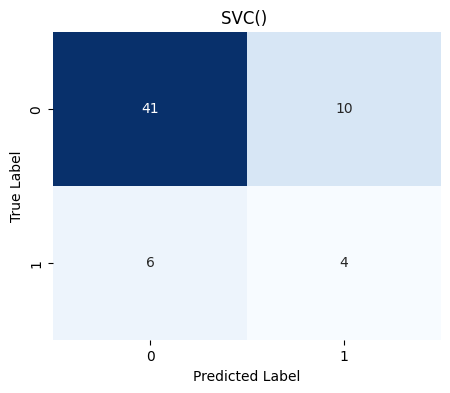

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.80      0.84        51
         1.0       0.29      0.40      0.33        10

    accuracy                           0.74        61
   macro avg       0.58      0.60      0.59        61
weighted avg       0.78      0.74      0.75        61



In [1561]:
svm=SVC()
ml_model(svm,x_train_over_sampled,y_train_over_sampled)

Cross-Validation f1: [0.80689883 0.69210526 0.76862228 0.69210526 0.8452381 ]
Mean f1: 0.7609939461121515


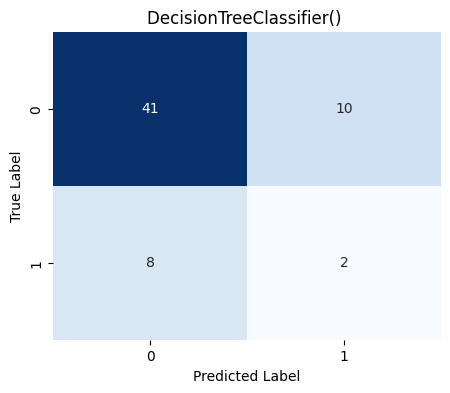

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.80      0.82        51
         1.0       0.17      0.20      0.18        10

    accuracy                           0.70        61
   macro avg       0.50      0.50      0.50        61
weighted avg       0.73      0.70      0.72        61



In [1562]:
dc=DecisionTreeClassifier()
ml_model(dc,x_train_over_sampled,y_train_over_sampled)

Cross-Validation f1: [0.84615385 0.74291365 0.85895118 0.72713643 0.9358869 ]
Mean f1: 0.8222083993219419


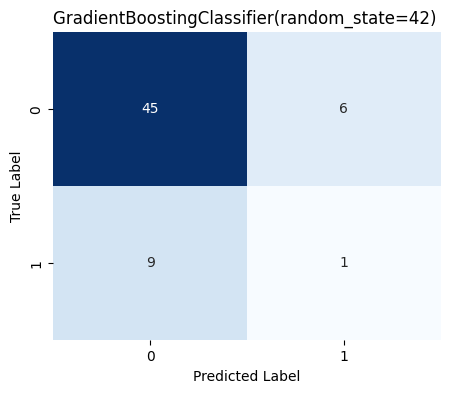

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.86        51
         1.0       0.14      0.10      0.12        10

    accuracy                           0.75        61
   macro avg       0.49      0.49      0.49        61
weighted avg       0.72      0.75      0.74        61



In [1563]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
ml_model(gb,x_train_over_sampled,y_train_over_sampled)

Cross-Validation f1: [0.59615385 0.5290566  0.65202471 0.56471647 0.53881366]
Mean f1: 0.5761530572365949


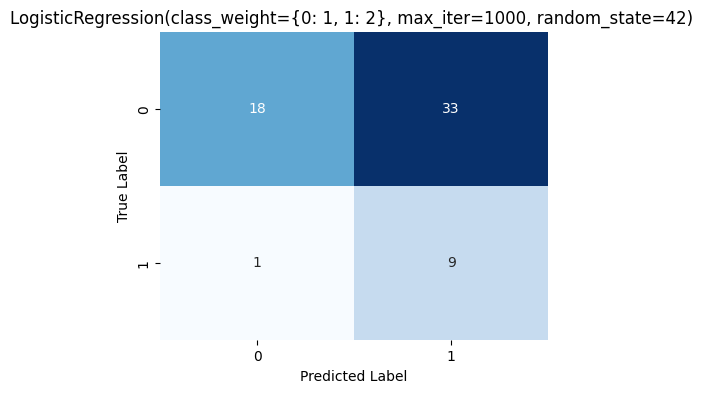

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.35      0.51        51
         1.0       0.21      0.90      0.35        10

    accuracy                           0.44        61
   macro avg       0.58      0.63      0.43        61
weighted avg       0.83      0.44      0.49        61



In [1564]:
class_weights = {0: 1, 1: 2}  # Class weights
log_reg = LogisticRegression(class_weight=class_weights, random_state=42, max_iter=1000)
ml_model(log_reg,x_train_over_sampled,y_train_over_sampled)

# SMOTETomek : Under sampling + Over sampling 

In [ ]:
from imblearn.combine import SMOTETomek #Combine oversampling and under sampling does removing tomek link. tomek link= closest neighbor of minor and major classes.
smt = SMOTETomek(random_state=42)               # It helpts to create clean dataset to differentiate minor and major class
x_traintome, y_traintome = smt.fit_resample(x_train, y_train)

Cross-Validation f1: [0.78201545 0.8974359  0.79433092 0.7890099  0.90890642]
Mean f1: 0.8343397156176671


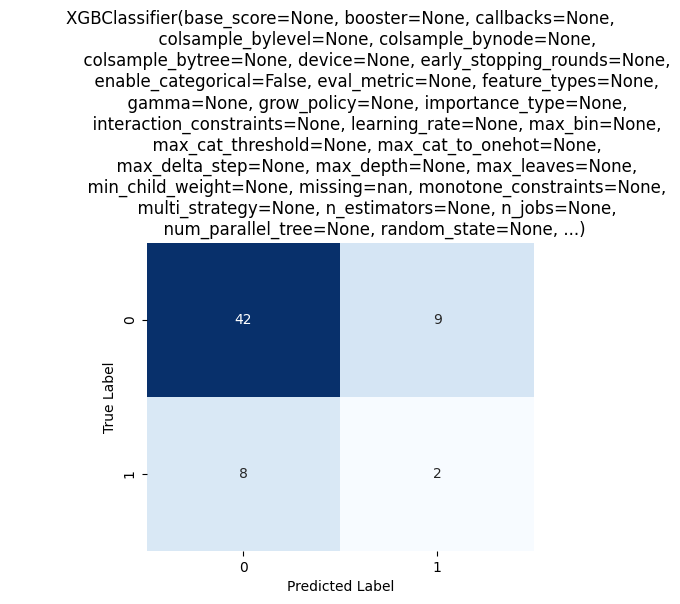

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        51
         1.0       0.18      0.20      0.19        10

    accuracy                           0.72        61
   macro avg       0.51      0.51      0.51        61
weighted avg       0.73      0.72      0.73        61



In [1566]:
from xgboost import XGBClassifier
model = XGBClassifier(scale_pos_weight=len(df[df['Patient_Status'] == 0]) / len(df[df['Patient_Status'] == 1]))

ml_model(model,x_traintome,y_traintome)


Cross-Validation f1: [0.80740741 0.88459642 0.83264565 0.79022882 0.85709464]
Mean f1: 0.834394585773933


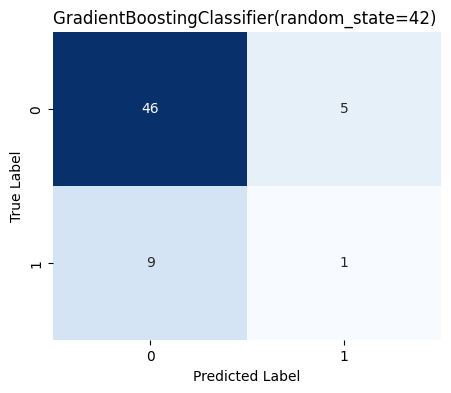

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87        51
         1.0       0.17      0.10      0.12        10

    accuracy                           0.77        61
   macro avg       0.50      0.50      0.50        61
weighted avg       0.73      0.77      0.75        61



In [1567]:
ml_model(gb,x_traintome,y_traintome) 

Cross-Validation f1: [0.76923077 0.85876543 0.74358974 0.6606219  0.8308262 ]
Mean f1: 0.7726068088070539


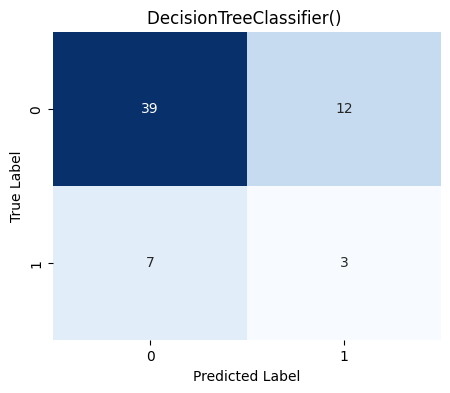

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.76      0.80        51
         1.0       0.20      0.30      0.24        10

    accuracy                           0.69        61
   macro avg       0.52      0.53      0.52        61
weighted avg       0.74      0.69      0.71        61



In [1568]:
df=DecisionTreeClassifier()
ml_model(df,x_traintome,y_traintome)

# NEARMiss UnderSampling Method

In [1569]:
from imblearn.under_sampling import NearMiss #undersampling=decreasing majority class
smote = NearMiss(version=3)
x_train_under_sampled, y_train_undersampled = smote.fit_resample(x_train, y_train)


Cross-Validation f1: [0.48571429 0.45819398 0.71428571 0.55555556 0.4375    ]
Mean f1: 0.5302499070977331


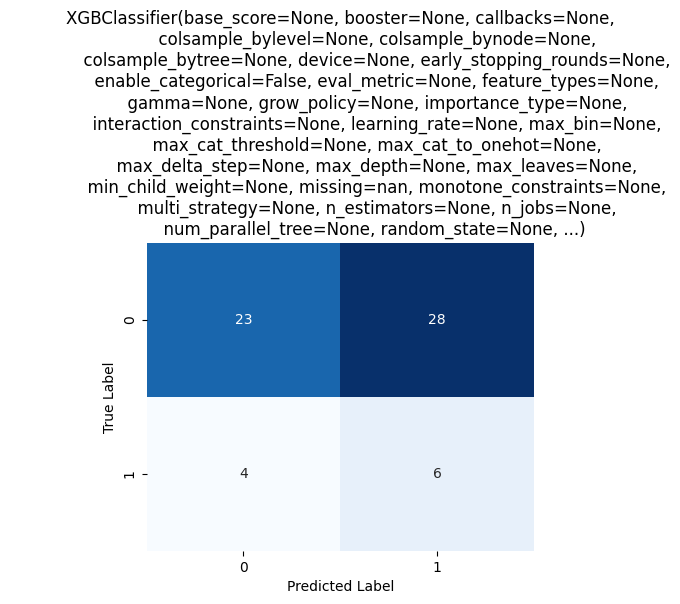

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.45      0.59        51
         1.0       0.18      0.60      0.27        10

    accuracy                           0.48        61
   macro avg       0.51      0.53      0.43        61
weighted avg       0.74      0.48      0.54        61



In [1570]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
ml_model(xgb,x_train_under_sampled,y_train_undersampled)

Cross-Validation f1: [0.49845201 0.33333333 0.55       0.71428571 0.55555556]
Mean f1: 0.5303253231117008


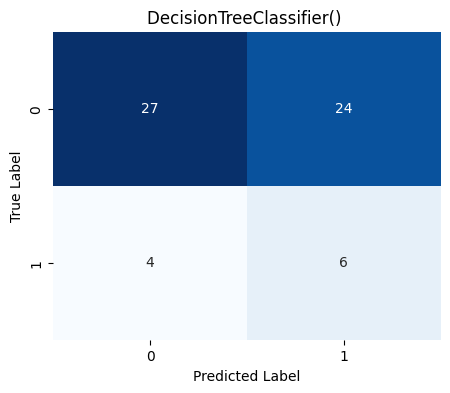

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.53      0.66        51
         1.0       0.20      0.60      0.30        10

    accuracy                           0.54        61
   macro avg       0.54      0.56      0.48        61
weighted avg       0.76      0.54      0.60        61



In [1571]:
df=DecisionTreeClassifier()
ml_model(df,x_train_under_sampled,y_train_undersampled)

Cross-Validation f1: [0.53246753 0.64935065 0.775      0.60990712 0.49845201]
Mean f1: 0.6130354629890233


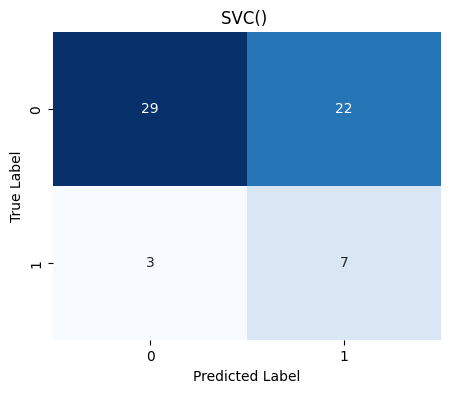

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.57      0.70        51
         1.0       0.24      0.70      0.36        10

    accuracy                           0.59        61
   macro avg       0.57      0.63      0.53        61
weighted avg       0.80      0.59      0.64        61



In [1572]:
ml_model(svm,x_train_under_sampled,y_train_undersampled)

Cross-Validation f1: [0.55555556 0.6        0.60990712 0.6        0.49845201]
Mean f1: 0.5727829377364981


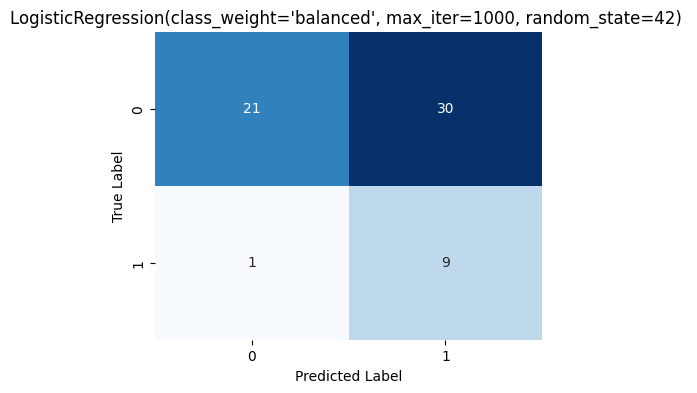

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.41      0.58        51
         1.0       0.23      0.90      0.37        10

    accuracy                           0.49        61
   macro avg       0.59      0.66      0.47        61
weighted avg       0.84      0.49      0.54        61



In [1573]:
ml_model(lr,x_train_under_sampled,y_train_undersampled)

Cross-Validation f1: [0.55       0.55       0.66666667 0.6625     0.48571429]
Mean f1: 0.5829761904761905


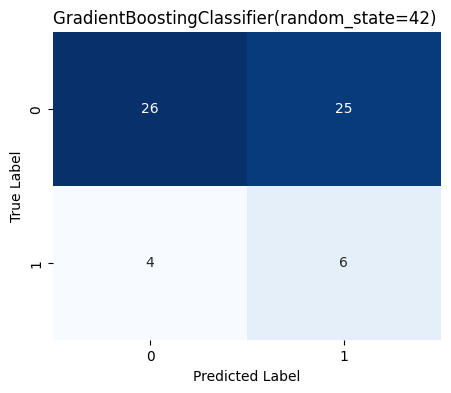

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.51      0.64        51
         1.0       0.19      0.60      0.29        10

    accuracy                           0.52        61
   macro avg       0.53      0.55      0.47        61
weighted avg       0.76      0.52      0.58        61



In [1574]:
ml_model(gb,x_train_under_sampled,y_train_undersampled)

# ADASYN Undersampling Method:

In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter
adasyn = ADASYN(sampling_strategy="auto", random_state=42, n_neighbors=5) # best parameters for best scoree 
x_resampled_ada, y_resampled_ada = adasyn.fit_resample(x, y)

print("Öncesi:", Counter(y))       #  Before ADASYN 
print("Sonrası:", Counter(y_resampled_ada))  # After ADASYN

Öncesi: Counter({0.0: 246, 1.0: 55})
Sonrası: Counter({0.0: 246, 1.0: 235})


Cross-Validation f1: [0.844198   0.85223765 0.83333333 0.875      0.85416667]
Mean f1: 0.8517871307193428


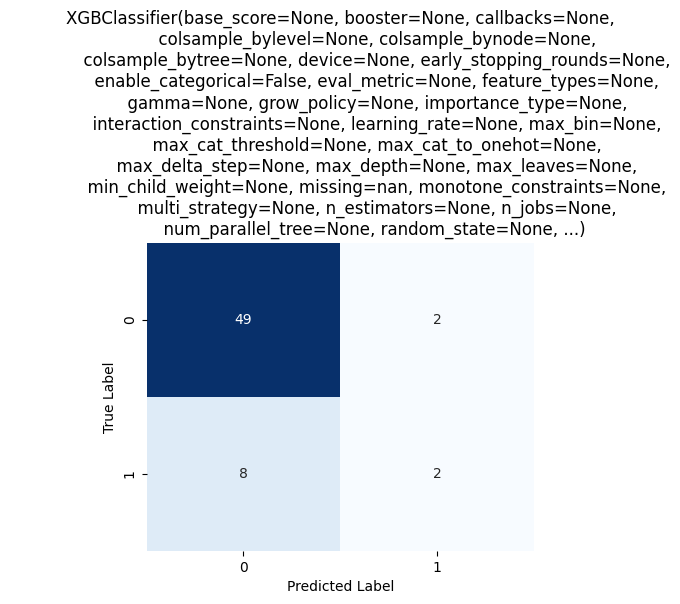

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.91        51
         1.0       0.50      0.20      0.29        10

    accuracy                           0.84        61
   macro avg       0.68      0.58      0.60        61
weighted avg       0.80      0.84      0.81        61

None
Cross-Validation f1: [0.82477954 0.77063406 0.78089361 0.79166667 0.73915906]
Mean f1: 0.7814265878089669


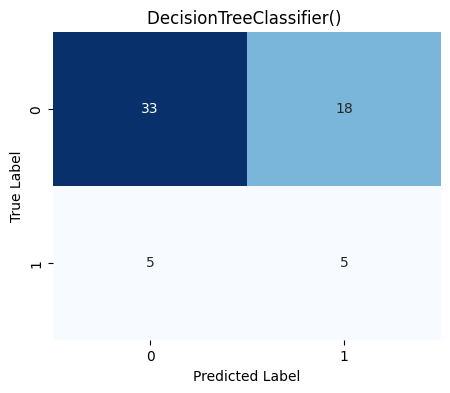

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.65      0.74        51
         1.0       0.22      0.50      0.30        10

    accuracy                           0.62        61
   macro avg       0.54      0.57      0.52        61
weighted avg       0.76      0.62      0.67        61

None
Cross-Validation f1: [0.52229516 0.46346604 0.4061853  0.3677662  0.44479167]
Mean f1: 0.4409008749380684


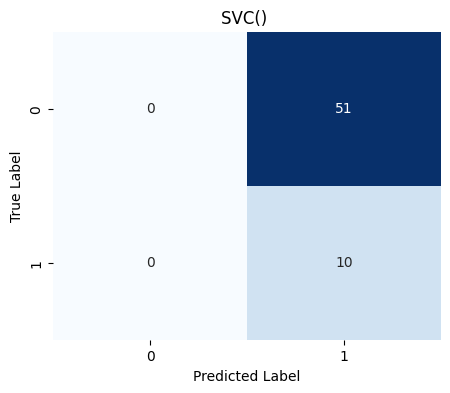

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        51
         1.0       0.16      1.00      0.28        10

    accuracy                           0.16        61
   macro avg       0.08      0.50      0.14        61
weighted avg       0.03      0.16      0.05        61

None
Cross-Validation f1: [0.57713959 0.64490942 0.625      0.63545623 0.53560406]
Mean f1: 0.6036218594185783


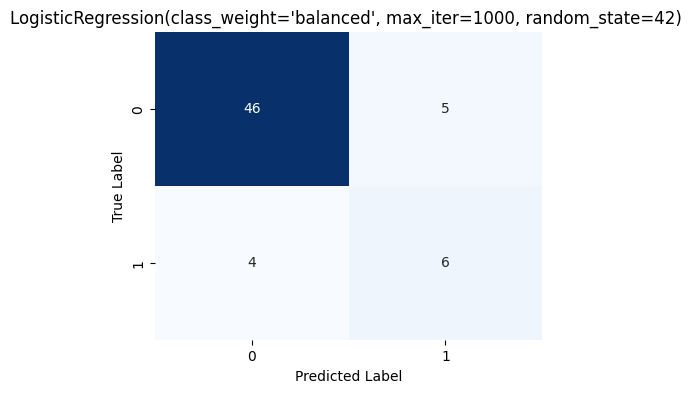

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91        51
         1.0       0.55      0.60      0.57        10

    accuracy                           0.85        61
   macro avg       0.73      0.75      0.74        61
weighted avg       0.86      0.85      0.86        61

None
Cross-Validation f1: [0.87511655 0.81151661 0.906097   0.85416667 0.8328976 ]
Mean f1: 0.8559588842131692


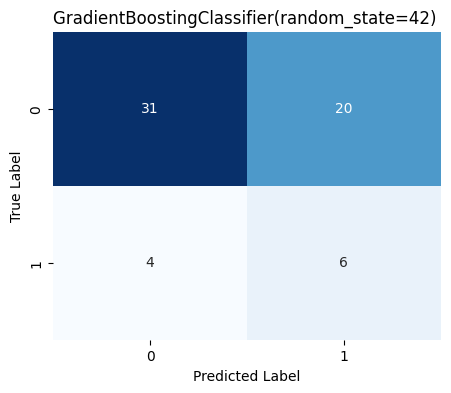

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.61      0.72        51
         1.0       0.23      0.60      0.33        10

    accuracy                           0.61        61
   macro avg       0.56      0.60      0.53        61
weighted avg       0.78      0.61      0.66        61

None


In [1576]:
models=[xgb,dc,svm,lr,gb]
for model in models:
    print(ml_model(model,x_resampled_ada,y_resampled_ada))

# Decided  Model is Logistic regression + ADASYN
 I will chose my model based on precision,recall and f1 score of each variable .




 ADASYN(adaptive synthetic sampling) gives more weight  to examples that are hard to learn, for this reason, it helps to learn variables with fewer numbers


# HYPER PARAMETER TUNING WITH METAHEURISTIC ALGORITHMS 🎯

Cross-Validation f1: [0.59776693 0.65568996 0.625      0.63545623 0.52614761]
Mean f1: 0.6080121460386059


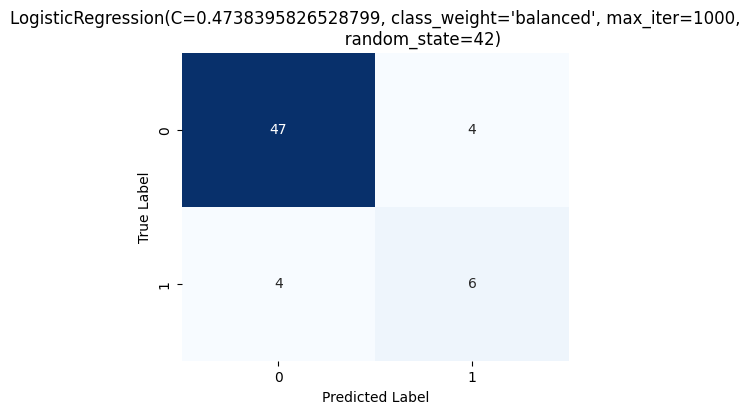

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        51
         1.0       0.60      0.60      0.60        10

    accuracy                           0.87        61
   macro avg       0.76      0.76      0.76        61
weighted avg       0.87      0.87      0.87        61



In [1577]:
# HYPER PARAMETER TUNING WITH METAHEURISTIC ALGORITHMS
lr=LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000,C=0.4738395826528799)
ml_model(lr,x_resampled_ada,y_resampled_ada)

In [1578]:
import numpy as np
from scipy.optimize import dual_annealing,differential_evolution
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [1579]:
def objective(params): 
    C = params[0]

    model = LogisticRegression(C=C, penalty="l2", random_state=42)
    f1 = cross_val_score(model, x_resampled_ada, y_resampled_ada, cv=5, scoring="f1").mean()
    return -f1  # Minimization required

#  Parameter range (C)
bounds = [(0.0001, 100)]

#  Optimization start (func(func,bounds))
result = dual_annealing(objective, bounds) # dual annealing optimization techniques

#  Best parameters
best_C = result.x[0]

print(f"✅ En iyi parametreler: C={best_C}")




✅ En iyi parametreler: C=29.346757037781284


Cross-Validation f1: [0.57650787 0.62467434 0.63529787 0.63529787 0.53560406]
Mean f1: 0.601476400939567


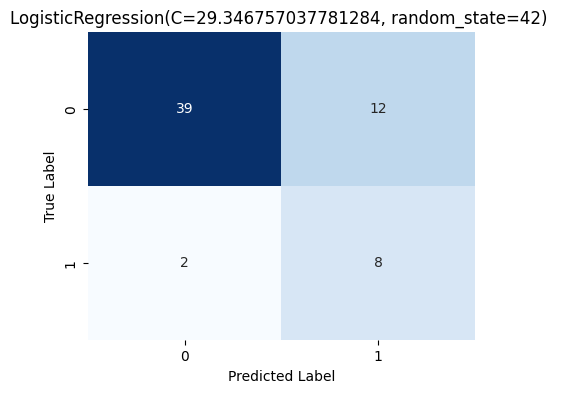

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.76      0.85        51
         1.0       0.40      0.80      0.53        10

    accuracy                           0.77        61
   macro avg       0.68      0.78      0.69        61
weighted avg       0.86      0.77      0.80        61



In [1580]:
#  best model run again 
best_model = LogisticRegression(C=best_C, penalty="l2", random_state=42)
ml_model(best_model,x_resampled_ada,y_resampled_ada)


In [1581]:
def objective(params):
    C = params[0]  # C parametresi (Regularization Strength)

    
    model = LogisticRegression(C=C, penalty="l2", solver="liblinear", random_state=42)
    f1 = cross_val_score(model, x_resampled_ada, y_resampled_ada, cv=5, scoring="f1_weighted").mean()
    return -f1  # Differential evolution minimazing so we take -

# 🔹 Parameter range
bounds = [(0.0001, 100)]  

# 🔹 Differential evolution algorithm
result = differential_evolution(objective, bounds, strategy="best1bin", maxiter=100, popsize=15)

# 🔹 best parameter
best_C = result.x[0]

print(f"✅ En iyi parametreler: C={best_C}")
# best model
best_model = LogisticRegression(C=best_C, penalty="l2", random_state=42)


✅ En iyi parametreler: C=32.41259301617995


Cross-Validation f1: [0.57650787 0.62467434 0.63529787 0.625      0.5586606 ]
Mean f1: 0.6040281347656877


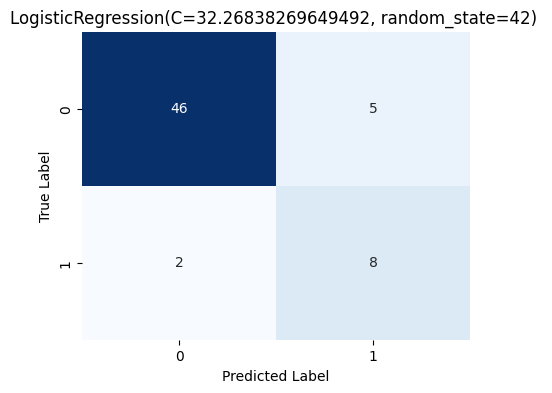

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93        51
         1.0       0.62      0.80      0.70        10

    accuracy                           0.89        61
   macro avg       0.79      0.85      0.81        61
weighted avg       0.90      0.89      0.89        61



In [1594]:

lr=LogisticRegression(C=32.2683826964949176, penalty="l2", random_state=42)
ml_model(lr,x_resampled_ada,y_resampled_ada) #Differential evolution best parameter


Cross-Validation f1: [0.57650787 0.64552576 0.625      0.63545623 0.54720771]
Mean f1: 0.6059395154423903


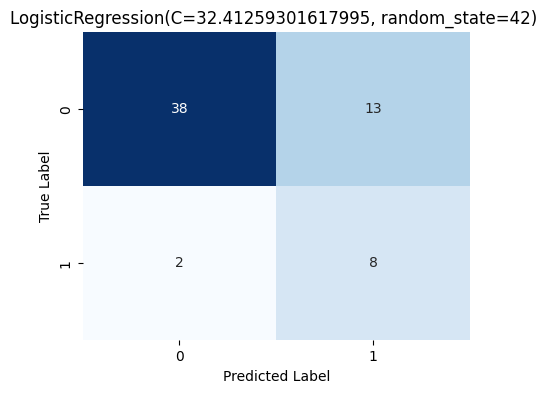

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.75      0.84        51
         1.0       0.38      0.80      0.52        10

    accuracy                           0.75        61
   macro avg       0.67      0.77      0.68        61
weighted avg       0.86      0.75      0.78        61



In [1583]:
ml_model(best_model,x_resampled_ada,y_resampled_ada) #Differential evolution best parameter


# Hyper parameter tuning with optuna to compare them.

In [1584]:
import optuna

def objective(trial):
    C = trial.suggest_loguniform("C", 0.01, 10)  # Daha dar bir aralık
    model = LogisticRegression(C=C, penalty="l2", solver="liblinear", random_state=42)
    f1 = cross_val_score(model, x_resampled_ada, y_resampled_ada, cv=5, scoring="f1").mean()
    return f1  

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print(f"✅ En iyi parametreler: {study.best_params}")

[I 2025-02-19 22:42:31,985] A new study created in memory with name: no-name-4e150f8a-aeb6-47b9-a82d-e28fe123b641
[I 2025-02-19 22:42:32,016] Trial 0 finished with value: 0.5629717107098354 and parameters: {'C': 0.015636655018520986}. Best is trial 0 with value: 0.5629717107098354.
[I 2025-02-19 22:42:32,058] Trial 1 finished with value: 0.5748159464086515 and parameters: {'C': 0.023941929554175366}. Best is trial 1 with value: 0.5748159464086515.
[I 2025-02-19 22:42:32,079] Trial 2 finished with value: 0.611904655247484 and parameters: {'C': 1.1186803396722178}. Best is trial 2 with value: 0.611904655247484.
[I 2025-02-19 22:42:32,127] Trial 3 finished with value: 0.599951473500159 and parameters: {'C': 0.07548746629185338}. Best is trial 2 with value: 0.611904655247484.
[I 2025-02-19 22:42:32,170] Trial 4 finished with value: 0.613823847166676 and parameters: {'C': 1.9594138095381306}. Best is trial 4 with value: 0.613823847166676.
[I 2025-02-19 22:42:32,210] Trial 5 finished with va

✅ En iyi parametreler: {'C': 1.9594138095381306}


Cross-Validation f1: [0.59776693 0.65568996 0.625      0.63545623 0.52614761]
Mean f1: 0.6080121460386059


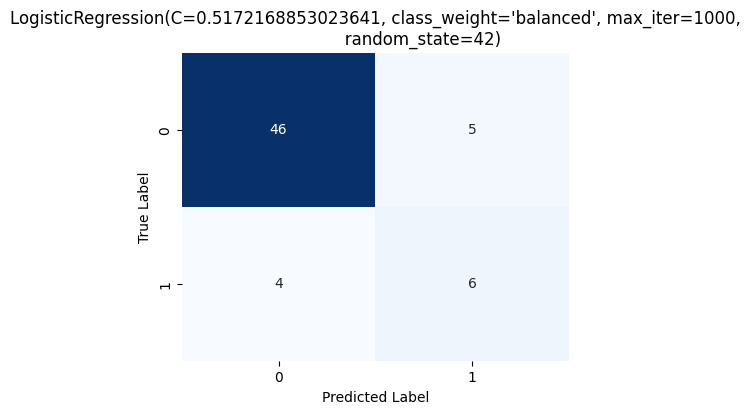

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91        51
         1.0       0.55      0.60      0.57        10

    accuracy                           0.85        61
   macro avg       0.73      0.75      0.74        61
weighted avg       0.86      0.85      0.86        61



In [1585]:
lr=LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000,C=0.5172168853023641) # scoring metric for optuna  =f1_macro
ml_model(lr,x_resampled_ada,y_resampled_ada)    

Cross-Validation f1: [0.58718943 0.65568996 0.625      0.63545623 0.52614761]
Mean f1: 0.6058966457632937


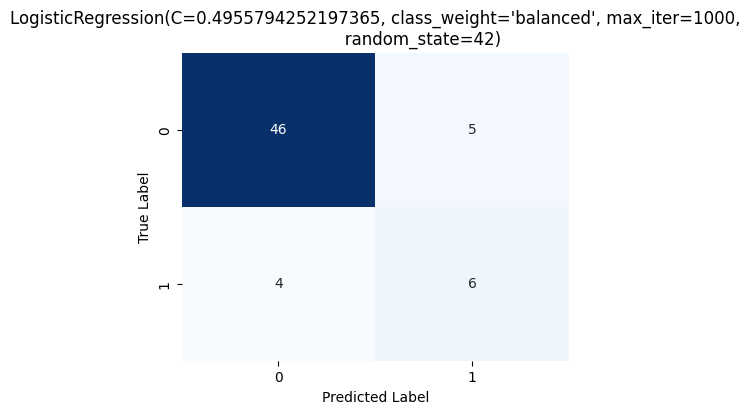

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91        51
         1.0       0.55      0.60      0.57        10

    accuracy                           0.85        61
   macro avg       0.73      0.75      0.74        61
weighted avg       0.86      0.85      0.86        61



In [1586]:
lr=LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000,C=0.4955794252197365) #=f1_weighted
ml_model(lr,x_resampled_ada,y_resampled_ada)   #  scoring_metric for optuna

Cross-Validation f1: [0.57713959 0.65568996 0.625      0.63545623 0.53560406]
Mean f1: 0.6057779681921485


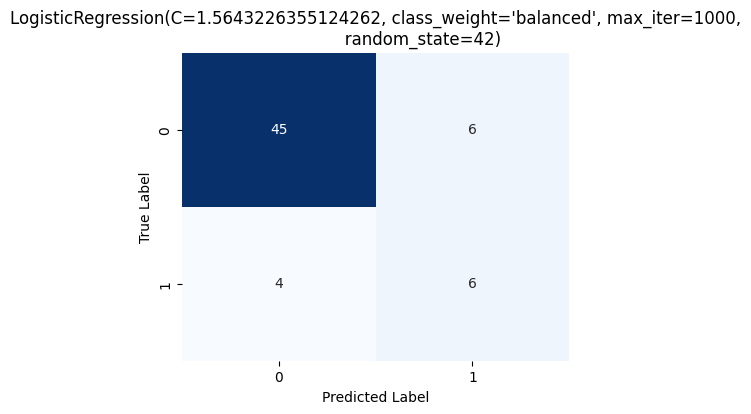

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        51
         1.0       0.50      0.60      0.55        10

    accuracy                           0.84        61
   macro avg       0.71      0.74      0.72        61
weighted avg       0.85      0.84      0.84        61



In [1587]:
lr=LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000,C=1.5643226355124262) # scoring_metric for optuna ="jaccard"

ml_model(lr,x_resampled_ada,y_resampled_ada)  

Cross-Validation f1: [0.55584972 0.65568996 0.63529787 0.63545623 0.55037317]
Mean f1: 0.6065333899334918


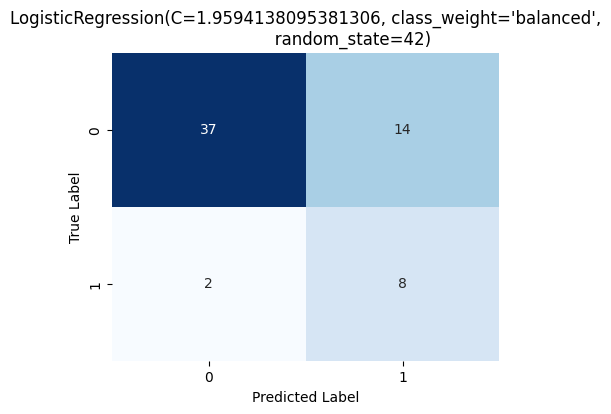

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.73      0.82        51
         1.0       0.36      0.80      0.50        10

    accuracy                           0.74        61
   macro avg       0.66      0.76      0.66        61
weighted avg       0.85      0.74      0.77        61



In [ ]:

lr=LogisticRegression(class_weight='balanced', random_state=42,C=1.9594138095381306) #scoring_metric for optuna=f1
ml_model(lr,x_resampled_ada,y_resampled_ada)  

# Best score is obtained with Logistic Regression + ADASYNC + Differential evolution hyper parameter tuning C=32.2683826964949176 


Cross-Validation f1: [0.57650787 0.62467434 0.63529787 0.625      0.5586606 ]
Mean f1: 0.6040281347656877


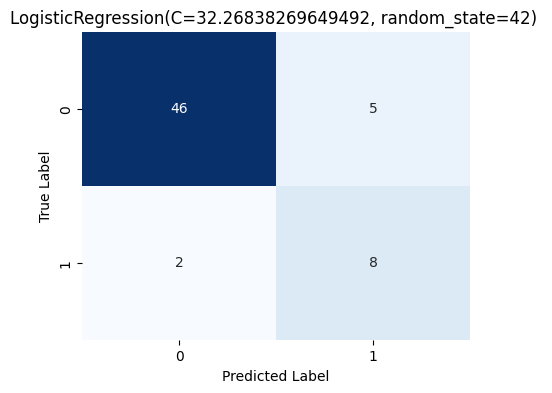

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93        51
         1.0       0.62      0.80      0.70        10

    accuracy                           0.89        61
   macro avg       0.79      0.85      0.81        61
weighted avg       0.90      0.89      0.89        61



In [1595]:
lr=LogisticRegression(C=32.2683826964949176, penalty="l2", random_state=42)
ml_model(lr,x_resampled_ada,y_resampled_ada) #Differential evolution best parameter


# CONCUSION 📋🤗
I tried both  popular hyperparameter tuning method which is optuna  and metaheuristic algorithms
the best one was taken from metaheuristic algorithm which is differential evolution 
FOR Handling imbalanced dataset I used ADASYN Which is  over sampling method. It create synthetic data based on difficulty of minor class. It succesfully increased f1 score because it works well on complex dataset as like our dataset.